In [1]:
from bauer.utils.data import load_garcia2022
from bauer.models import MagnitudeComparisonModel
import numpy as np
import pandas as pd
import seaborn as sns
from bauer.utils.plotting import plot_ppc

In [2]:
df = load_garcia2022()

In [3]:
df

cueonset1  cueoffset1  cueonset2  cueoffset2  \
subject run trial_nr                                                 
1       1   1             35070       36600      36600       37630   
            2             50095       51614      51614       52628   
            3             65565       67087      67087       68095   
            4             79005       80523      80523       81527   
            5             92946       94467      94467       95473   
...                         ...         ...        ...         ...   
64      6   212          479612      481136     481136      482144   
            213          492572      494095     494095      495099   
            214          508029      509551     509551      510553   
            215          522477      524003     524003      525009   
            216          536425      537952     537952      538962   

                      stimonset1  stimoffset1  isistimonset  isistimoffset  \
subject run trial_nr                                                         
1       1   1              37630        38243         38276          46276   
            2              52628        53248         53280          61780   
            3              68095        68719         68752          75252   
            4              81527        82147         82180          89180   
            5              95473        96096         96129         105129   
...                          ...          ...           ...            ...   
64      6   212           482144       482747        482780         488780   
            213           495099       495702        495734         504234   
            214           510553       511158        511190         518690   
            215           525009       525637        525669         532669   
            216           538962       539566        539599         546599   

                      stimonset2  stimoffset2  ...  diffval  rad  correct  \
subject run trial_nr                           ...                          
1       1   1              46276        46903  ...       -3  190       -1   
            2              61780        62380  ...       -9  170       -1   
            3              75252        75852  ...       -7  210       -1   
            4              89180        89810  ...       -3  210       -1   
            5             105129       105754  ...       -5  150       -1   
...                          ...          ...  ...      ...  ...      ...   
64      6   212           488780       489382  ...       -7  170       -1   
            213           504234       504865  ...       -6  170       -1   
            214           518690       519323  ...        6  150        1   
            215           532669       533290  ...        3  150        1   
            216           546599       547231  ...      -14  200       -1   

                      leftright  pressedkey  n1  n2  choice  log(n1/n2)  \
subject run trial_nr                                                      
1       1   1                -1          49   7  10    True   -0.356675   
            2                 1          51   5  14   False   -1.029619   
            3                -1          49   7  14    True   -0.693147   
            4                -1          49   7  10    True   -0.356675   
            5                -1          49   5  10    True   -0.693147   
...                         ...         ...  ..  ..     ...         ...   
64      6   212              -1          49   7  14    True   -0.693147   
            213               1          51  14  20   False   -0.356675   
            214               1          51  20  14   False    0.356675   
            215               1          51   5   2   False    0.916291   
            216               1          51  14  28   False   -0.693147   

                      log(n2/n1)  
subject run trial_nr              
1       1   1           0.356675  
            2

In [4]:
model = MagnitudeComparisonModel(df)

In [5]:
model.build_estimation_model()

{'n1_prior_mu': mean, 'n1_prior_std': std, 'n2_prior_std': std, 'threshold': 0.0, 'n2_prior_mu': AdvancedSubtensor.0, 'n1_evidence_sd': Elemwise{softplus,no_inplace}.0, 'n2_evidence_sd': Elemwise{softplus,no_inplace}.0}


In [6]:
trace = model.sample(draws=1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n1_evidence_sd_mu_untransformed, n1_evidence_sd_sd, n1_evidence_sd_offset, n2_evidence_sd_mu_untransformed, n2_evidence_sd_sd, n2_evidence_sd_offset, n2_prior_mu_mu, n2_prior_mu_sd, n2_prior_mu_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.


In [7]:
ppc = model.ppc()

Sampling: [ll_bernoulli]


In [8]:
df

cueonset1  cueoffset1  cueonset2  cueoffset2  \
subject run trial_nr                                                 
1       1   1             35070       36600      36600       37630   
            2             50095       51614      51614       52628   
            3             65565       67087      67087       68095   
            4             79005       80523      80523       81527   
            5             92946       94467      94467       95473   
...                         ...         ...        ...         ...   
64      6   212          479612      481136     481136      482144   
            213          492572      494095     494095      495099   
            214          508029      509551     509551      510553   
            215          522477      524003     524003      525009   
            216          536425      537952     537952      538962   

                      stimonset1  stimoffset1  isistimonset  isistimoffset  \
subject run trial_nr                                                         
1       1   1              37630        38243         38276          46276   
            2              52628        53248         53280          61780   
            3              68095        68719         68752          75252   
            4              81527        82147         82180          89180   
            5              95473        96096         96129         105129   
...                          ...          ...           ...            ...   
64      6   212           482144       482747        482780         488780   
            213           495099       495702        495734         504234   
            214           510553       511158        511190         518690   
            215           525009       525637        525669         532669   
            216           538962       539566        539599         546599   

                      stimonset2  stimoffset2  ...  diffval  rad  correct  \
subject run trial_nr                           ...                          
1       1   1              46276        46903  ...       -3  190       -1   
            2              61780        62380  ...       -9  170       -1   
            3              75252        75852  ...       -7  210       -1   
            4              89180        89810  ...       -3  210       -1   
            5             105129       105754  ...       -5  150       -1   
...                          ...          ...  ...      ...  ...      ...   
64      6   212           488780       489382  ...       -7  170       -1   
            213           504234       504865  ...       -6  170       -1   
            214           518690       519323  ...        6  150        1   
            215           532669       533290  ...        3  150        1   
            216           546599       547231  ...      -14  200       -1   

                      leftright  pressedkey  n1  n2  choice  log(n1/n2)  \
subject run trial_nr                                                      
1       1   1                -1          49   7  10    True   -0.356675   
            2                 1          51   5  14   False   -1.029619   
            3                -1          49   7  14    True   -0.693147   
            4                -1          49   7  10    True   -0.356675   
            5                -1          49   5  10    True   -0.693147   
...                         ...         ...  ..  ..     ...         ...   
64      6   212              -1          49   7  14    True   -0.693147   
            213               1          51  14  20   False   -0.356675   
            214               1          51  20  14   False    0.356675   
            215               1          51   5   2   False    0.916291   
            216               1          51  14  28   False   -0.693147   

                      log(n2/n1)  
subject run trial_nr              
1       1   1           0.356675  
            2

/Users/gdehol/git/bauer/bauer/utils/bayes.py:29: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


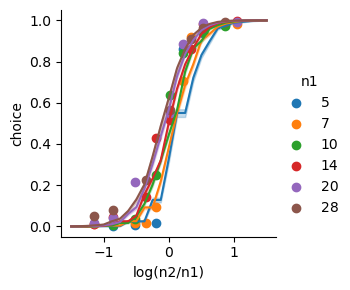

In [9]:
plot_ppc(df, ppc, level='group', plot_type=1)

/Users/gdehol/git/bauer/bauer/utils/bayes.py:29: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,
/Users/gdehol/git/bauer/bauer/utils/plotting.py:43: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df.groupby(groupby).mean()[['choice']]


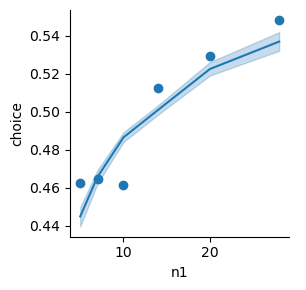

In [10]:
plot_ppc(df, ppc, level='group', plot_type=2)

/Users/gdehol/git/bauer/bauer/utils/bayes.py:29: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


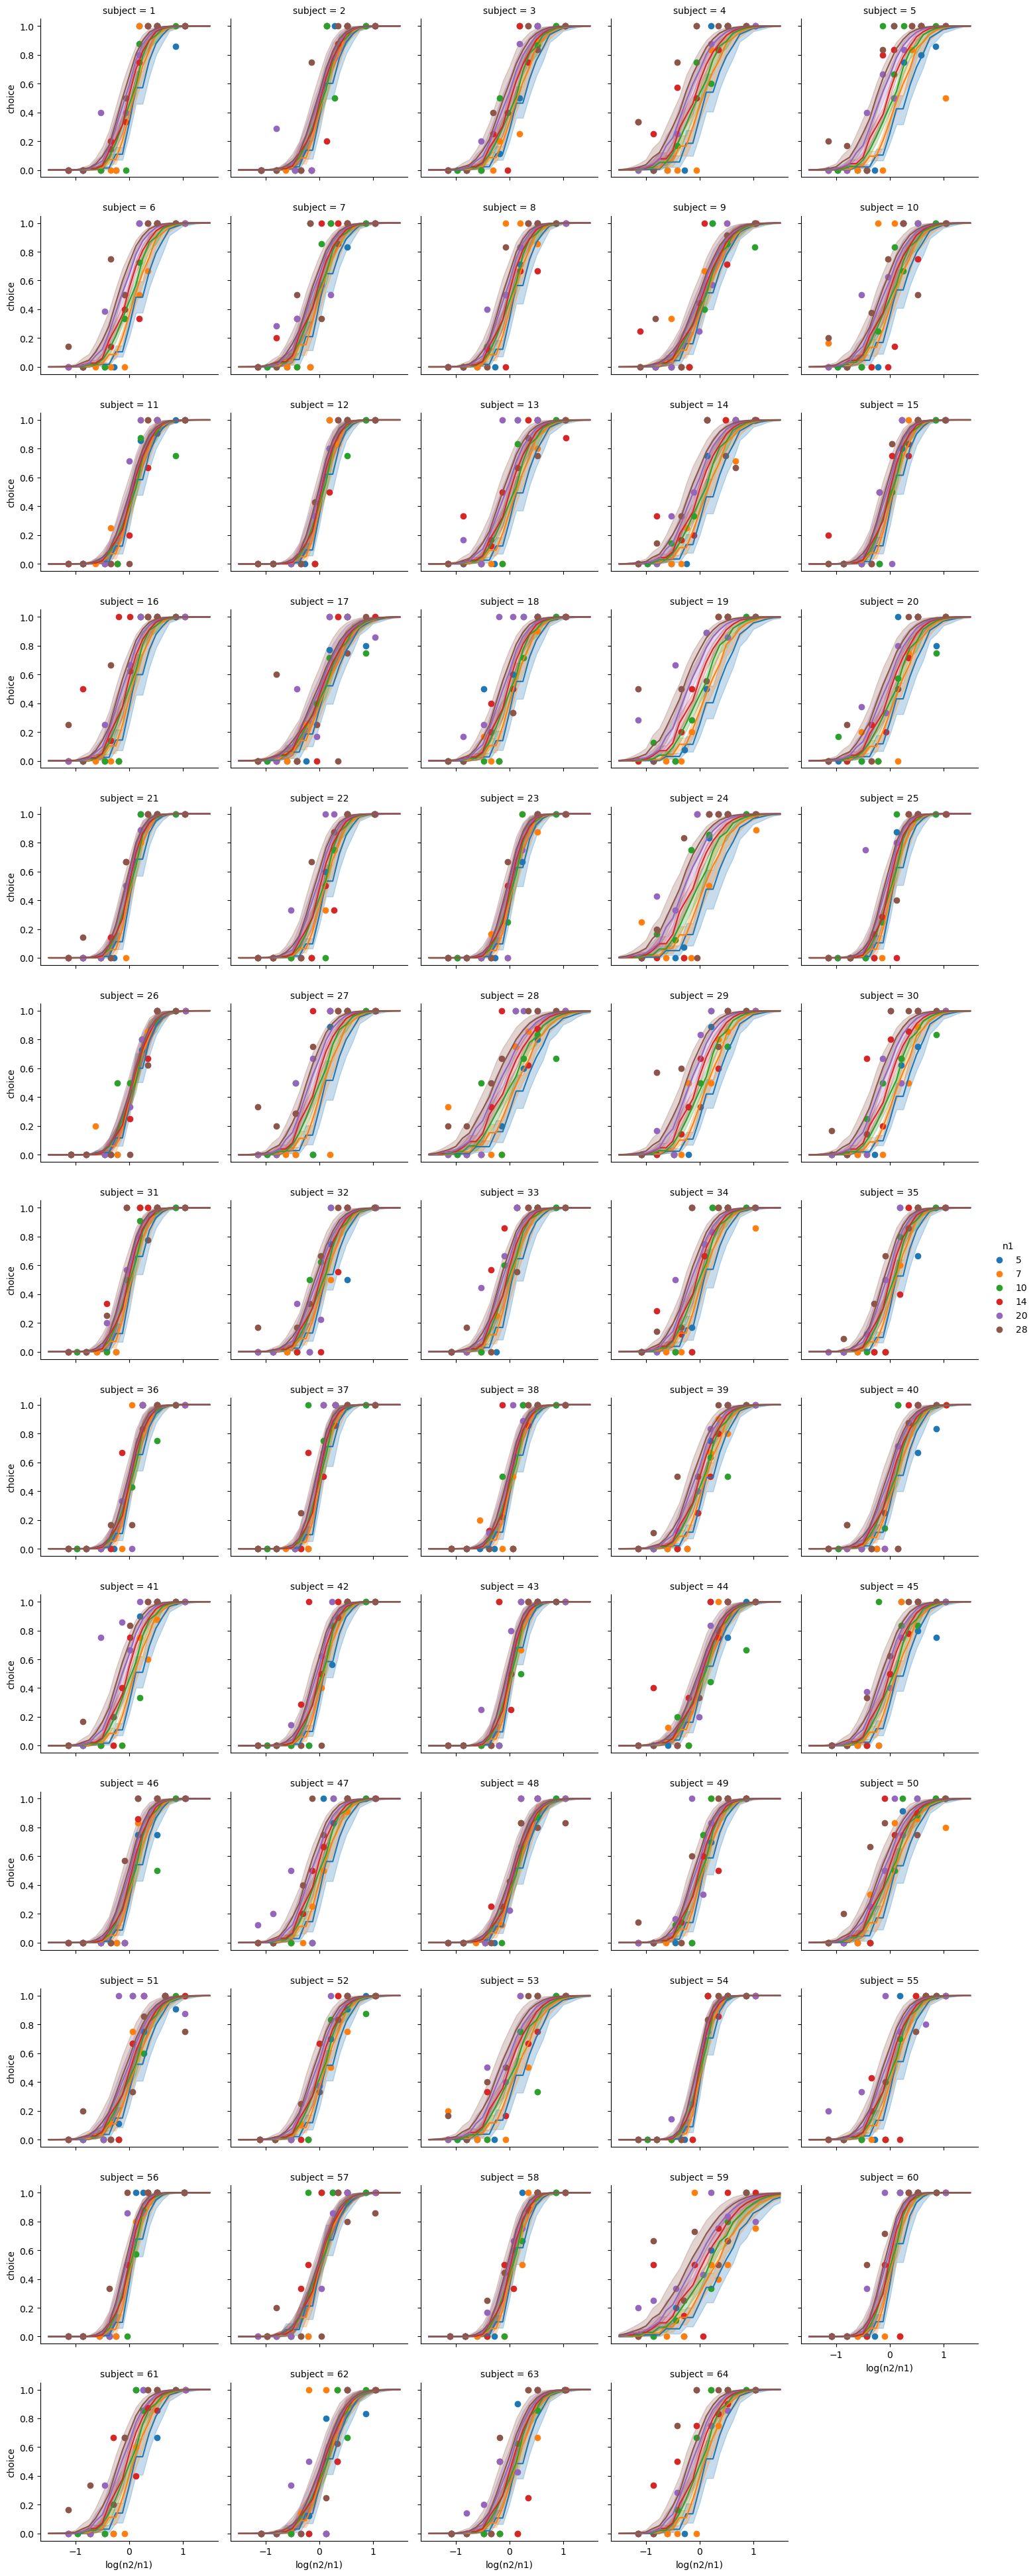

In [11]:
plot_ppc(df, ppc, level='subject', plot_type=1, var_name='p')

/Users/gdehol/git/bauer/bauer/utils/bayes.py:29: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


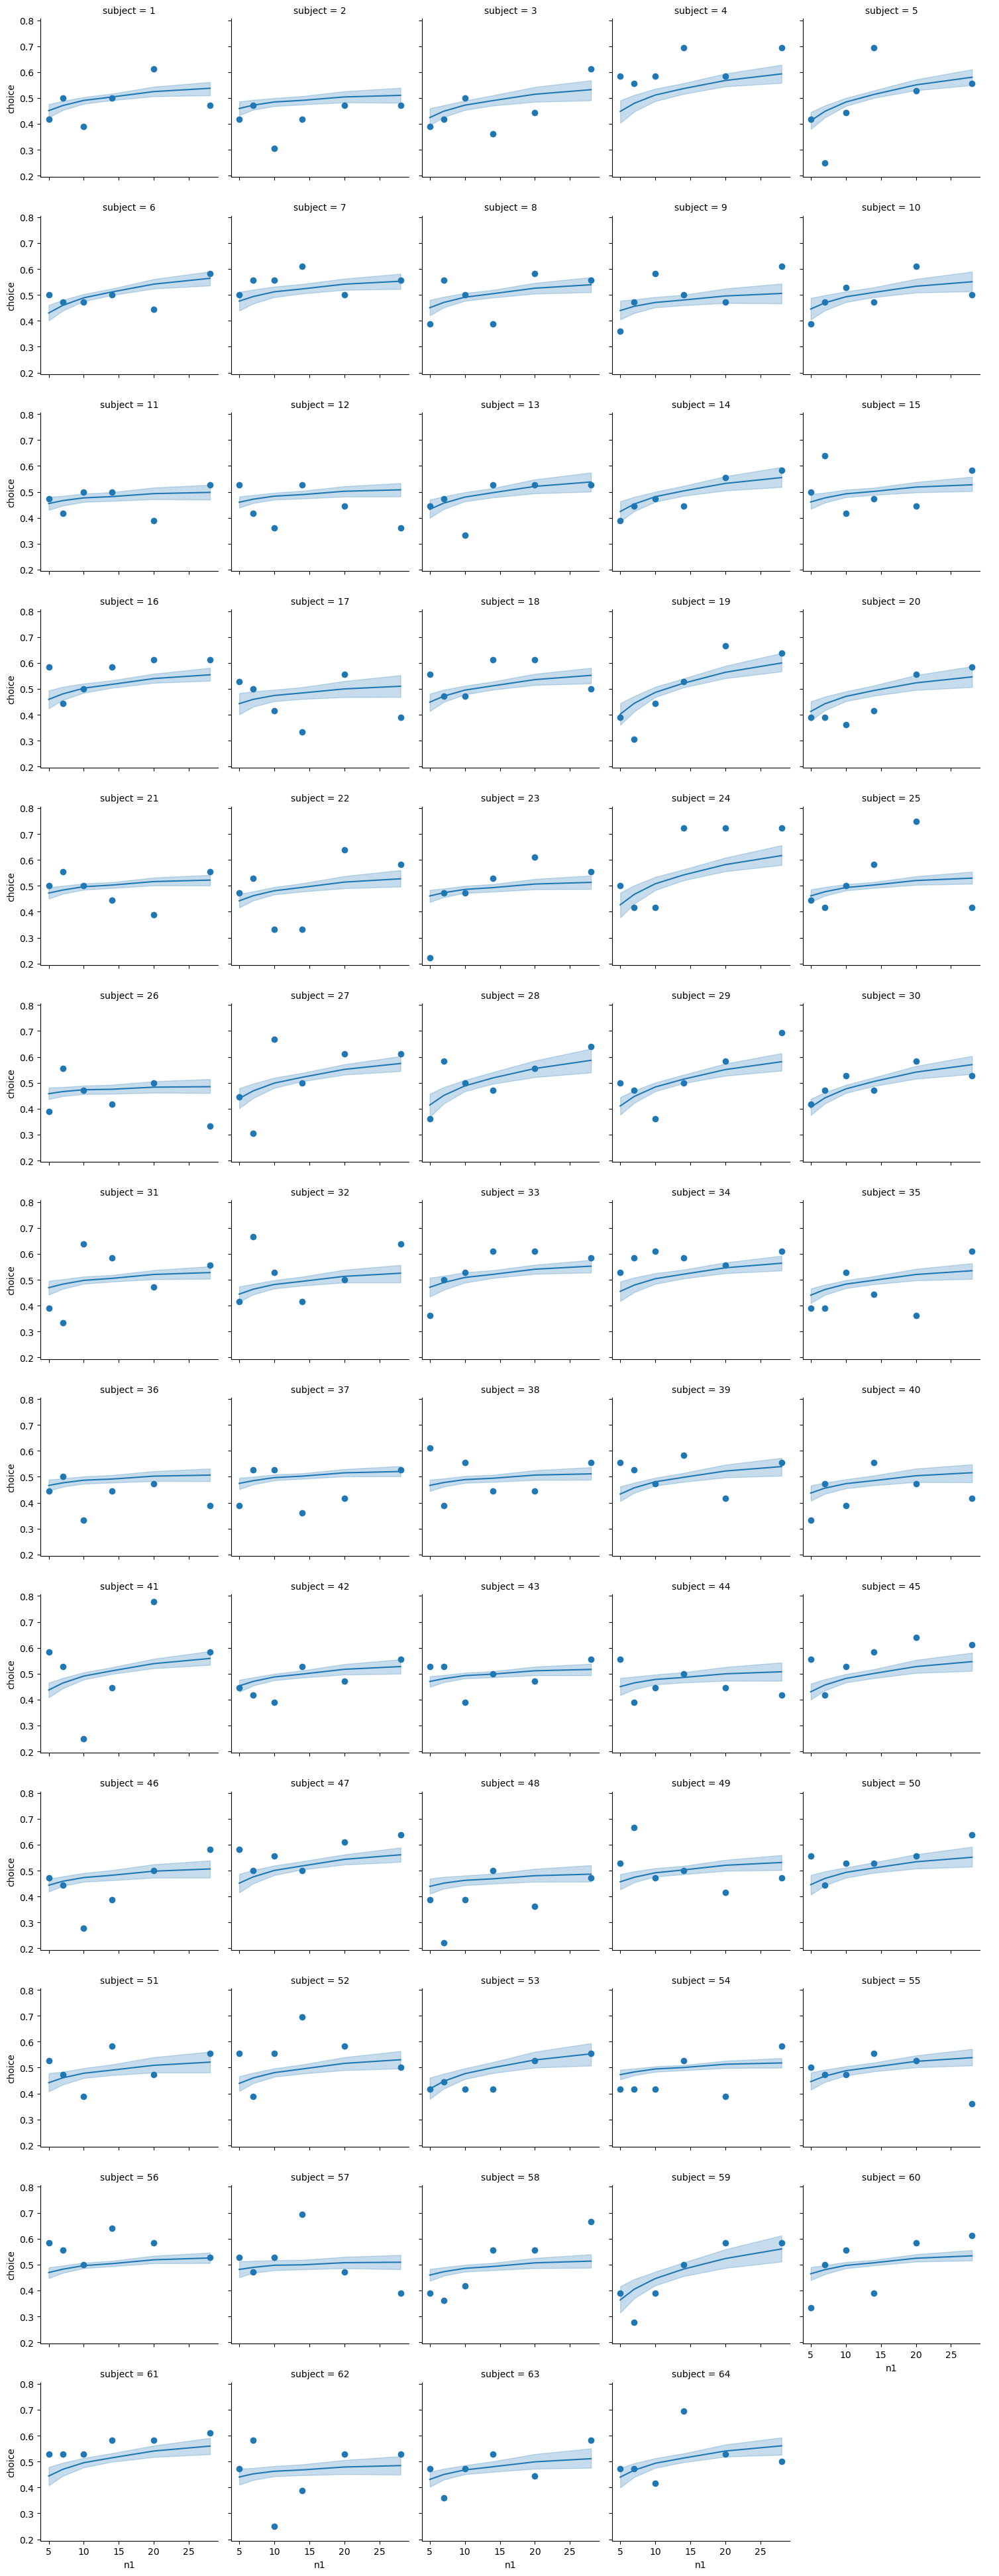

In [12]:
plot_ppc(df, ppc, level='subject', plot_type=2, var_name='p')

In [13]:
import arviz as az
import matplotlib.pyplot as plt

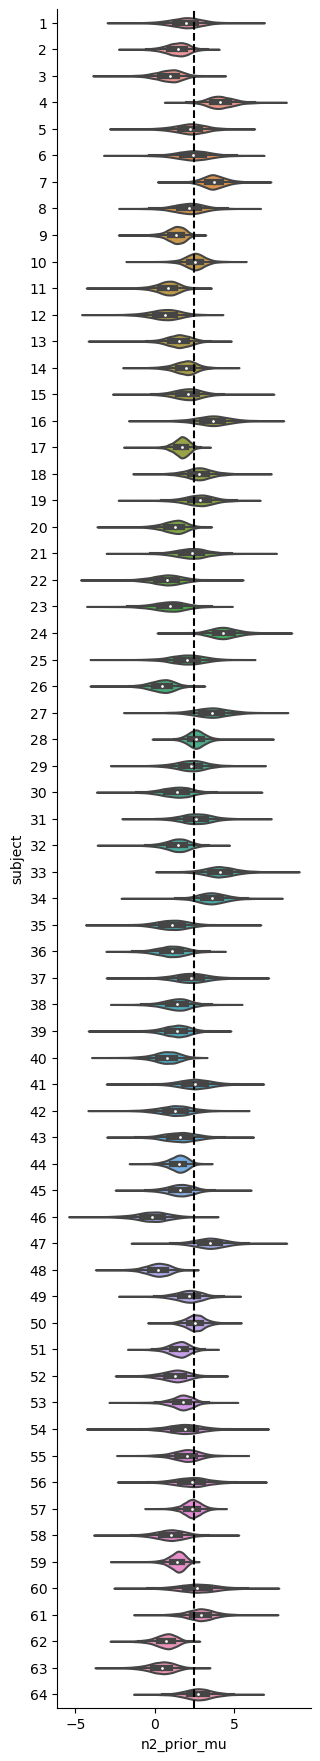

In [14]:
n2_prior_mu = trace.posterior['n2_prior_mu'].to_dataframe()#.reset_index()
n2_prior_mu = n2_prior_mu.reset_index()
n2_prior_mu['subject'] = pd.Categorical(n2_prior_mu['subject'])
fac = sns.catplot(y='subject', x='n2_prior_mu', data=n2_prior_mu.reset_index(), kind='violin')
plt.axvline(np.log(df['n2']).mean(), c='k', ls='--')

fac.fig.set_size_inches(3., 20)

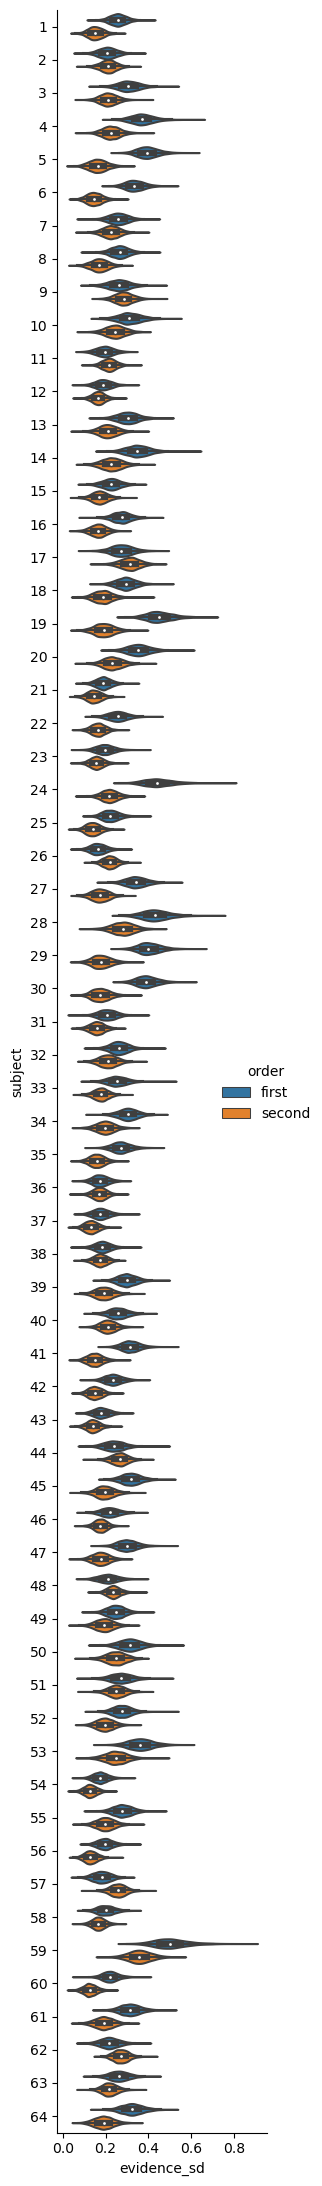

In [33]:
evidence_sd1 = trace.posterior['n1_evidence_sd'].to_dataframe()
evidence_sd2 = trace.posterior['n2_evidence_sd'].to_dataframe()

# evidence_sd = evidence_sd1.join(evidence_sd2)
evidence_sd = pd.concat((evidence_sd1['n1_evidence_sd'], evidence_sd2['n2_evidence_sd']),
keys=['first', 'second'], names=['order'], axis=0).to_frame('evidence_sd')

index_names = evidence_sd.index.names
evidence_sd.reset_index(inplace=True)
evidence_sd['subject'] = pd.Categorical(evidence_sd['subject'])
evidence_sd.set_index(keys=index_names, inplace=True)

fac = sns.catplot(x='evidence_sd', hue='order', y='subject', data=evidence_sd.reset_index(), kind='violin')

fac.fig.set_size_inches(3., 25.)

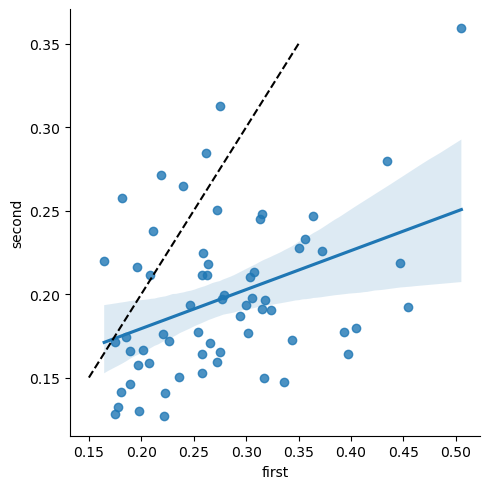

In [35]:
# evidence_sd = trace.posterior['evidence_sd'].to_dataframe()
sns.lmplot(x='first', y='second', data=evidence_sd.unstack('order')['evidence_sd'].groupby(['subject']).mean())
plt.plot([.15, .35], [.15, .35], c='k', ls='--')

In [36]:
import pingouin
pingouin.corr(*evidence_sd.unstack('order')['evidence_sd'].groupby(['subject']).mean().values.T)

,n,r,CI95%,p-val,BF10,power
pearson,64,0.386684,"[0.16, 0.58]",0.001598,20.318,0.893921


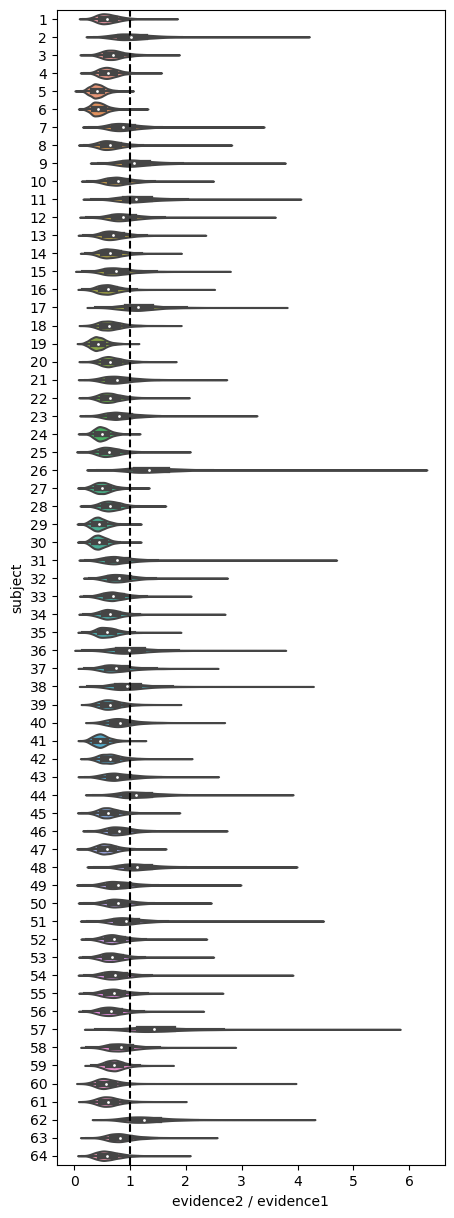

In [39]:
tmp = evidence_sd.unstack('order').droplevel(0, 1)

tmp = (tmp['second'] / tmp['first']).to_frame('evidence2 / evidence1').reset_index()
tmp['subject'] = pd.Categorical(tmp['subject'])

fac = sns.violinplot(data=tmp, x='evidence2 / evidence1', y='subject', kind='violin', aspect=3)
fac.figure.set_size_inches(5, 15)

plt.axvline(1.0, c='k', ls='--')